In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("d:/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df2=pd.get_dummies(df,columns=['sex'])

In [6]:
df2.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [7]:
df3=pd.get_dummies(df2,columns=['smoker'])

In [8]:
df3.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [9]:
df4=pd.get_dummies(df3,columns=['region'])

In [10]:
df4.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Simple linear regression

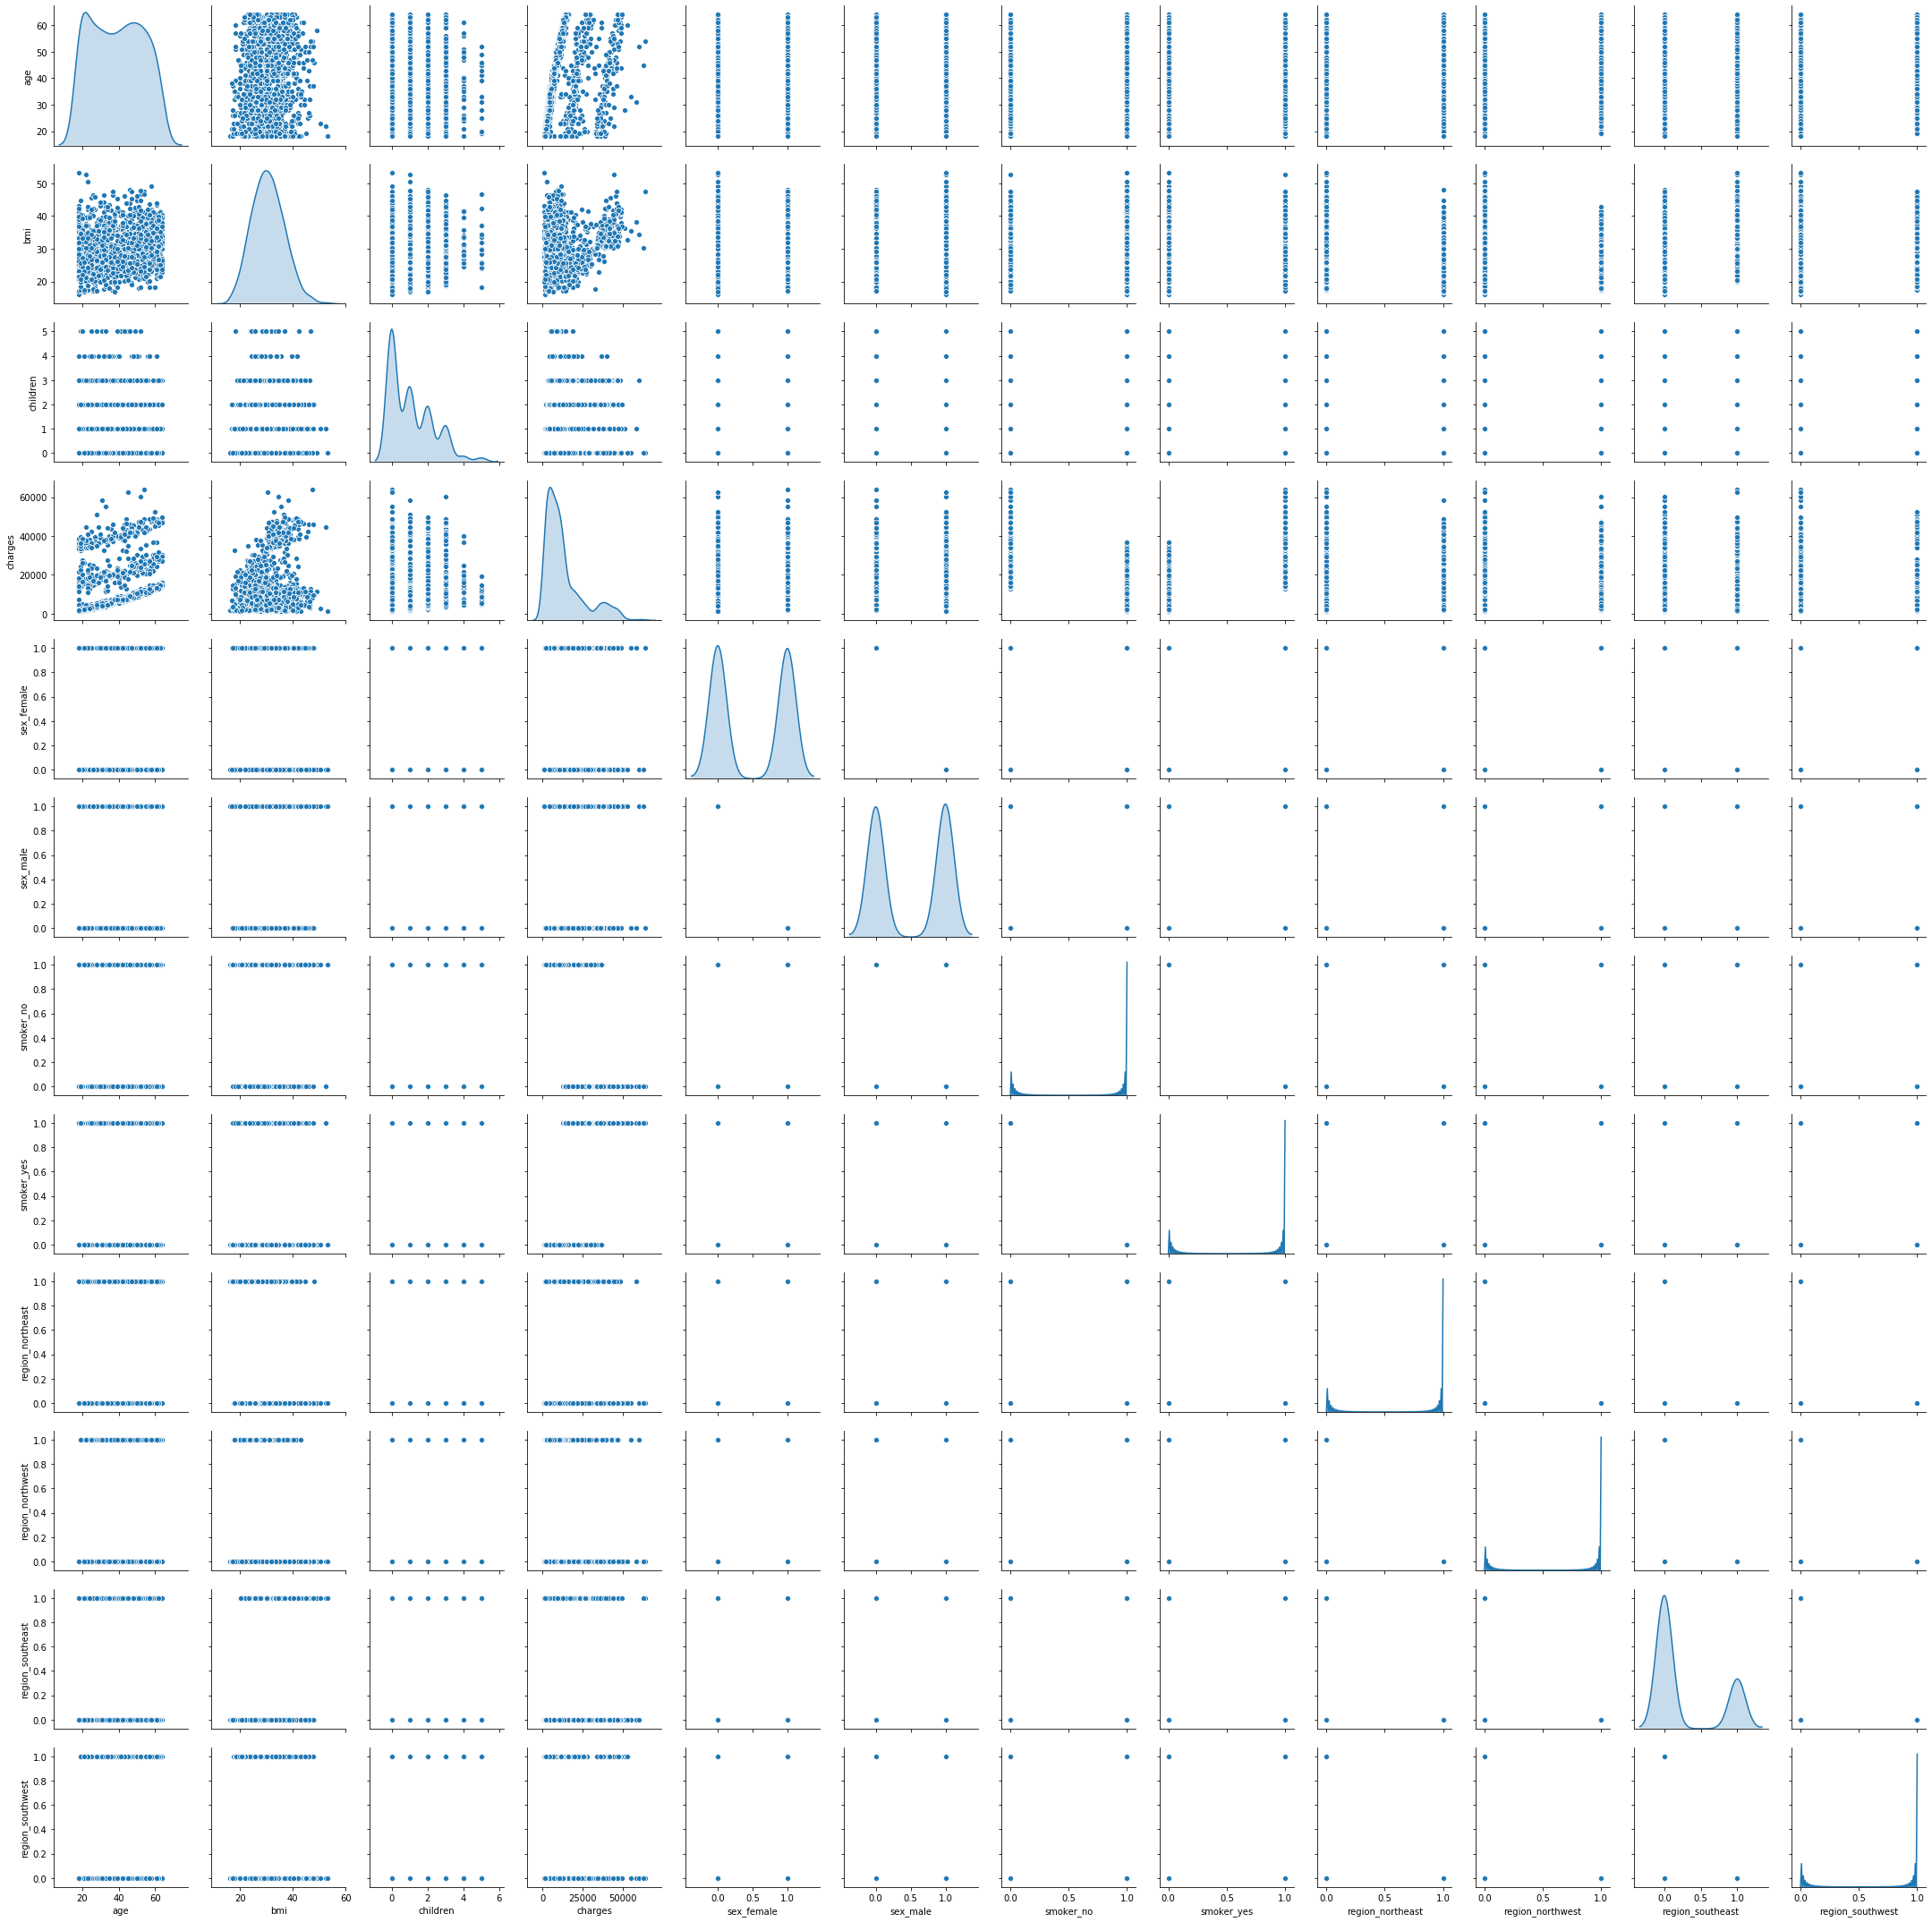

In [11]:
sns.pairplot(df4,diag_kind='kde')

In [12]:
df4.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

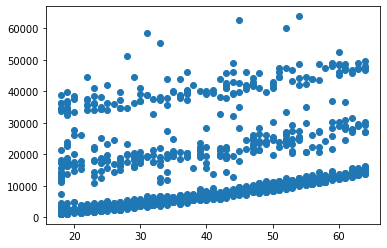

In [13]:
plt.scatter(df['age'],df['charges'])

In [14]:
from scipy.stats import pearsonr
print(pearsonr(df4['age'],df4['charges']))

(0.29900819333064765, 4.886693331722474e-29)


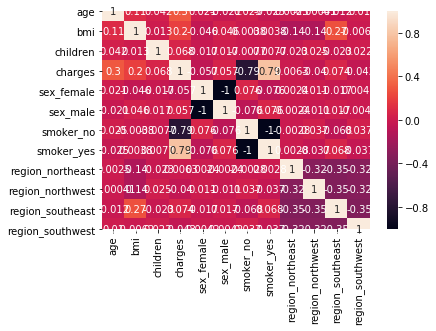

In [15]:
sns.heatmap(df4.corr(),annot=True)


In [16]:
import sklearn.linear_model as lm


In [17]:
mod1=lm.LinearRegression()

In [18]:
x=pd.DataFrame(df4['smoker_yes'])
y=pd.DataFrame(df4['charges'])


In [19]:
mod1=mod1.fit(x,y)

In [20]:
pred=mod1.predict(x)


In [21]:
pred_new=np.array(pred)
y_new=np.array(y)

In [22]:
pred_new.shape

(1338, 1)

In [23]:
y_new.shape

(1338, 1)

In [24]:
dict={"actual":y_new.flatten(),"predicted":pred_new.flatten()}
dict

{'actual': array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]),
 'predicted': array([32050.23183153,  8434.26829786,  8434.26829786, ...,
         8434.26829786,  8434.26829786, 32050.23183153])}

In [25]:
import pandas as pnd
df5=pnd.DataFrame(dict)
df5

,actual,predicted
0,16884.92400,32050.231832
1,1725.55230,8434.268298
2,4449.46200,8434.268298
3,21984.47061,8434.268298
4,3866.85520,8434.268298
5,3756.62160,8434.268298
6,8240.58960,8434.268298
7,7281.50560,8434.268298
8,6406.41070,8434.268298
9,28923.13692,8434.268298


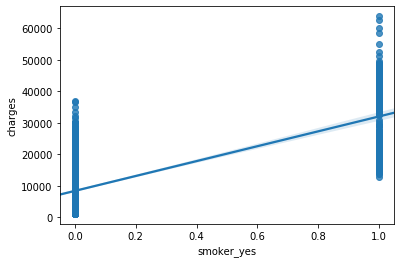

In [26]:
import matplotlib.pyplot as plt
sns.regplot(x=df4['smoker_yes'],y=df4['charges'],ci=95)

plt.show()

# calculation of r-square

In [27]:
#R_sq=1-sse/sst
#ssr=sum of squares regression (diff between predicted(y) and mean(y)sq)
ssr=0
for i in pred_new:
    ssr=ssr+(i-np.mean(pred_new.flatten()))**2
print('sum of square regression:',ssr)



sum of square regression: [1.21519904e+11]


In [28]:
#sum of square errors(sse) sum((pred_y-y)**2)
sse=0
for j in range(len(pred_new)):

    
    sse=sse+(pred_new[j].flatten()-y_new[j].flatten())**2
print('sum of squate errors',sse)


sum of squate errors [7.45543179e+10]


In [29]:
#total deviation
sst=ssr+sse
sst

array([1.96074222e+11])

In [30]:
#r_square or coefficient of determination
r_sq=ssr/sst
r_sq

array([0.61976481])

In [31]:
np.corrcoef(y_new.flatten(),pred_new.flatten())[0,1]**2

0.6197648148218977

In [32]:
from sklearn.metrics import r2_score

In [33]:
print(r2_score(y_new,pred_new))

0.6197648148218988


# R-square calculated through 3 different methods yield the same result.


# 1.r_square=ssr/sst  2. r_square=cor(y_actual,y_pred)**2 3. r_square=sklearn.metrics.r2_score(y_actual,y_pred)

regression through machine learning

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
x=pd.DataFrame(df4['smoker_yes'])
y=pd.DataFrame(df4['charges'])
x.shape

(1338, 1)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)


In [37]:
mod2=LinearRegression()

In [38]:

x_train.head()

,smoker_yes
268,0
17,0
1257,0
1099,0
209,0


In [39]:
y_train.head()

,charges
268,7441.05300
17,2395.17155
1257,11305.93455
1099,3227.12110
209,6610.10970


In [40]:
x_test.head()

,smoker_yes
486,0
961,0
51,0
1016,0
628,0


In [41]:
y_test.head()

,charges
486,12475.35130
961,3353.28400
51,3579.82870
1016,2709.24395
628,11365.95200


In [42]:
x_train.shape

(936, 1)

In [43]:
mod2=mod2.fit(x_train,y_train)

In [44]:
pred2=mod2.predict(x_test)

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred2))

0.5826097155376739


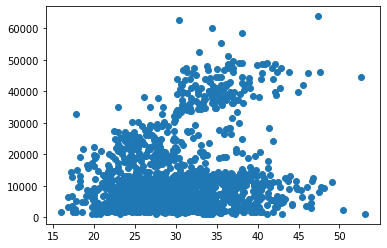

In [46]:
plt.scatter(df4['bmi'],df4['charges'])

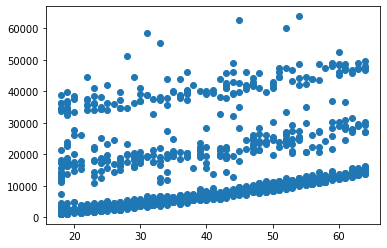

In [47]:
plt.scatter(df4['age'],df4['charges'])

In [90]:
x_new=pd.DataFrame(df4['smoker_yes'])
y_new=pd.DataFrame(df4['charges'])
x_new_tr,x_new_test,y_new_tr,y_new_test=train_test_split(x_new,y_new,test_size=.3)

In [91]:
mod3=LinearRegression()

In [92]:
mod3=mod3.fit(x_new_tr,y_new_tr)

In [93]:
pred3=mod3.predict(x_new_test)

In [94]:
print(r2_score(y_new_test,pred3))

0.60115890227049


# multiple regression with stats model

In [53]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


In [54]:
mod4=ols("charges~age+bmi+smoker_yes+smoker_no+children+sex_female+sex_male+region_northeast+region_northwest+region_southeast+region_southwest",data=df4).fit()

In [55]:
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:06:00   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -296.4168    430.507     -0.689      0.491   -1140.964     548.130
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
smoker_yes        1.178e+04    313.530     37.560      0.000    1.12e+04    1.24e+04
smoker_no        -1.207e+04    282.338    -42.759      0.000   -1.26e+04   -1.15e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_female         -82.5512    269.226     -0.307      0.759    -610.706     445.604
sex_male          -213.8656    274.976     -0.778      0.437    -753.299     325.568
region_northeast   512.9050    300.348      1.708      0.088     -76.303    1102.113
region_northwest   159.9411    301.334      0.531      0.596    -431.201     751.083
region_southeast  -522.1170    330.759     -1.579      0.115   -1170.983     126.749
region_southwest  -447.1459    310.933     -1.438      0.151   -1057.119     162.827
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     8.55e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.81e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Forward selection

In [56]:

mod5=ols("charges~age+bmi+smoker_yes+smoker_no+children",data=df4).fit()

In [57]:
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:06:01   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -131.3796    629.912     -0.209      0.835   -1367.107    1104.348
age          257.8495     11.896     21.675      0.000     234.512     281.187
bmi          321.8514     27.378     11.756      0.000     268.143     375.559
smoker_yes  1.184e+04    396.710     29.846      0.000    1.11e+04    1.26e+04
smoker_no  -1.197e+04    354.354    -33.784      0.000   -1.27e+04   -1.13e+04
children     473.5023    137.792      3.436      0.001     203.190     743.814
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                     2.63e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
x_ols=pd.DataFrame(df4.iloc[:,[0,1,2,6,7]])

In [59]:
x.head()


,smoker_yes
0,1
1,0
2,0
3,0
4,0


In [60]:
y_ols=pd.DataFrame(df4.iloc[:,3:4])

In [61]:
y_ols.head()


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [62]:
x_tr,x_test,y_tr,y_test=train_test_split(x_ols,y_ols,test_size=.3,random_state=200)
data_tr,data_test=train_test_split(df4,test_size=.3,random_state=200)
x_tr.shape

(936, 5)

In [63]:
sm_model=ols("y_tr~x_tr",data=data_tr).fit()


In [64]:

pred_stat_mod=sm_model.predict(x_tr)

In [65]:
#accuracy on the training model
print(r2_score(y_tr,pred_stat_mod))

0.7470753978231989


# Backward ellimination method

In [66]:
x_ols=pd.DataFrame(df4.iloc[:,:])
y_ols=pd.DataFrame(df4.iloc[:,3:4])
x_ols.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [67]:
ols_mod6=ols("df4['charges']~df4-df4['charges']-df4['region_northeast']-df4['region_northwest']-df4['region_southeast']-df4['region_southwest']-df4['sex_male']-df4['sex_female']",data=df4).fit()

In [68]:
ols_mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         df4['charges']   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.176e+32
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:06:03   Log-Likelihood:                 32431.
No. Observations:                1338   AIC:                        -6.484e+04
Df Residuals:                    1328   BIC:                        -6.479e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.457e-12   5.13e-13     10.636      0.000    4.45e-12    6.46e-12
df4[0]     -1.918e-13   1.65e-14    -11.643      0.000   -2.24e-13    -1.6e-13
df4[1]     -1.172e-13   3.58e-14     -3.272      0.001   -1.88e-13   -4.69e-14
df4[2]              0   1.65e-13          0      1.000   -3.24e-13    3.24e-13
df4[3]         1.0000   3.27e-17   3.06e+16      0.000       1.000       1.000
df4[4]      4.263e-12   3.21e-13     13.290      0.000    3.63e-12    4.89e-12
df4[5]      1.876e-12   3.28e-13      5.724      0.000    1.23e-12    2.52e-12
df4[6]      2.728e-12   5.19e-13      5.262      0.000    1.71e-12    3.75e-12
df4[7]      3.183e-12   5.36e-13      5.935      0.000    2.13e-12    4.24e-12
df4[8]      2.103e-12   3.58e-13      5.871      0.000     1.4e-12    2.81e-12
df4[9]      4.547e-13   3.59e-13      1.266      0.206    -2.5e-13    1.16e-12
df4[10]     5.684e-13   3.94e-13      1.441      0.150   -2.05e-13    1.34e-12
df4[11]     2.245e-12   3.71e-13      6.056      0.000    1.52e-12    2.97e-12
==============================================================================
Omnibus:                      121.786   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.264
Skew:                           0.797   Prob(JB):                     3.18e-34
Kurtosis:                       3.474   Cond. No.                     2.52e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
pred_mod6=ols_mod6.predict(df4)

In [70]:
print(r2_score(y_ols,pred_mod6))

1.0


# stats model for prediction on test dataset using OLS method from stasmodels.api

In [71]:
import statsmodels.api as sm

In [72]:
x_OLS=np.array(df4.iloc[:,[0,1,2,6,7]])

In [73]:
y_OLS=np.array(df4.iloc[:,3:4])

In [74]:
x_tr,x_test,y_tr,y_test=train_test_split(x_OLS,y_OLS,test_size=.3,random_state=200)
x_tr_new=sm.add_constant(x_tr)

mod6=sm.OLS(y_tr,x_tr_new).fit()
mod6.params

array([   189.36782469,    255.93917871,    306.33253365,    608.6317098 ,
       -11883.84162157,  12073.20944625])

In [75]:
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     687.5
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          4.31e-276
Time:                        09:06:07   Log-Likelihood:                -9482.2
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     931   BIC:                         1.900e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.3678    771.050      0.246      0.806   -1323.830    1702.565
x1           255.9392     14.624     17.501      0.000     227.238     284.640
x2           306.3325     33.212      9.224      0.000     241.153     371.512
x3           608.6317    165.805      3.671      0.000     283.236     934.027
x4         -1.188e+04    430.553    -27.601      0.000   -1.27e+04    -1.1e+04
x5          1.207e+04    485.592     24.863      0.000    1.11e+04     1.3e+04
==============================================================================
Omnibus:                      225.696   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.746
Skew:                           1.256   Prob(JB):                    1.91e-124
Kurtosis:                       5.881   Cond. No.                     4.50e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# prediction using LinearRegression method from sklearn.Linear_model

In [76]:
lin_mod7=LinearRegression()

In [77]:
x_lin=pd.DataFrame(df4.iloc[:,[0,1,2,6,7]])
y_lin=pd.DataFrame(df4.iloc[:,3:4])
x_tr,x_test,y_tr,y_test=train_test_split(x_lin,y_lin,test_size=.3,random_state=200)
lin_mod7.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
pred_lin_mod=lin_mod7.predict(x_test)

In [79]:
print(r2_score(y_test,pred_lin_mod))

0.7541305238661349


# testing multicollinearity

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_lin.head()

,age,bmi,children,smoker_no,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [81]:
vif=[]
for i in range(x_lin.shape[1]):
    vif.append(variance_inflation_factor(x_lin.values, i))
    

In [82]:
vif

[1.0144976257510443,
 1.012194440119411,
 1.001949545213691,
 25.642947077712805,
 7.313770334494338]

In [83]:
#vif(k)=1/1-r_sq(k)
vif_new=[]
i=0
for i in range(x_lin.shape[1]):
    y=x_lin.iloc[:,i:i+1]
    #print(y.head())    
    filter=x_lin.iloc[:,i:i+1]
    x=x_lin.drop(filter,axis=1)
    #print(x.head())
    model=LinearRegression()
    model=model.fit(x,y)
    pred=model.predict(x)
    r_sq=r2_score(y,pred)
    print(r_sq)
    vif=1/(1-r_sq)
    #print(vif)
    vif_new.append(vif)
print(vif_new)

0.014290448181494275
0.01204752726953573
0.0019457518824218534
1.0
1.0
[1.0144976257510443, 1.012194440119411, 1.0019495452136913, inf, inf]


C:\Users\INDRANI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\INDRANI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


# cross validation

# ridge regression

In [84]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [85]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


In [86]:
ridge_model = Ridge()

In [87]:
folds = 5
model_cv = GridSearchCV(estimator = ridge_model, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [88]:
model_cv.best_params_

{'alpha': 0.0001}

In [96]:
ridge=Ridge(alpha=0.0001)
x_tr,x_test,y_tr,y_test=train_test_split(x_lin,y_lin,test_size=.3,random_state=200)
model_r = ridge.fit(x_tr,y_tr)
yridge = model_r.predict(x_test)

r_squared = r2_score(y_test, yridge)


print('r_square_value :',r_squared)

r_square_value : 0.7541305333766151


In [ ]:
lasso_model=Lasso()
folds = 5
model_cv = GridSearchCV(estimator =lasso_model, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train)

In [ ]:
model_cv.best_params_

In [97]:
lasso=Lasso(alpha=0.0001)
model_l = lasso.fit(x_tr,y_tr)
ylasso = model_l.predict(x_test)
r_squared = r2_score(y_test, ylasso)


print('r_square_value :',r_squared)

r_square_value : 0.7541305251142268


In [ ]:
ridge_predict=model_cv.predict(x_test)

In [ ]:
print(r2_score(ridge_predict, y_test))
